Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

Step 2: Importing and Uploading the Dataset

In [2]:
df_india = pd.read_csv("/content/covid_19_india.csv")
df_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


Step 3: Analysing The Data

In [3]:
"Getting numeric column detials "
df_india.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [4]:
"Getting information of null values in Dataset"
df_india.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
"finding unique values from 'State/UnionTerritory' column"
df_india['State/UnionTerritory'].unique(),df_india['State/UnionTerritory'].nunique()

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya',
        'Dadra and Nagar Haveli and Daman and Diu',
        'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
        'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
        'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
        'Maharashtra***'], dtype=object),
 46)

In [6]:
"Changing the format of date"
df_india['Date'] = pd.to_datetime(df_india['Date'])
df_india['Date'] = df_india['Date'].dt.strftime('%d-%m-%Y')

In [7]:
"Removing unwanted columns from dataset using 'drop'."
df_india.drop(['Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis = 1,inplace = True)

Step 4: Data Manipulation

In [8]:
"Identifying active cases , We counted the values by using values in confirmed, cured, deaths column"
df_india['Active'] = df_india['Confirmed'] - df_india['Cured'] - df_india['Deaths']
df_india.tail()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
18105,18106,11-08-2021,Telangana,638410,3831,650353,8112
18106,18107,11-08-2021,Tripura,77811,773,80660,2076
18107,18108,11-08-2021,Uttarakhand,334650,7368,342462,444
18108,18109,11-08-2021,Uttar Pradesh,1685492,22775,1708812,545
18109,18110,11-08-2021,West Bengal,1506532,18252,1534999,10215


In [9]:
"using pivot function to find cured , deaths , confirmed cases State wise"
statewise = pd.pivot_table(df_india,values=['Cured','Deaths','Confirmed'],index='State/UnionTerritory',aggfunc='max',margins=True)
statewise.head()

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646


In [10]:
def topTen(status):
  df_10 = df_india.nlargest(10,[status])
  df_10 = df_india.groupby(['State/UnionTerritory'])[status].max().sort_values(ascending=False).reset_index()
  df_top = df_10.nlargest(10,status)
  return df_top

In [11]:
"Top 10 states with most Active cases"
df_active = topTen('Active')
df_active

,State/UnionTerritory,Active
0,Maharashtra,701614
1,Karnataka,605515
2,Kerala,445692
3,Tamil Nadu,313048
4,Uttar Pradesh,310783
5,Rajasthan,212753
6,Andhra Pradesh,211554
7,Gujarat,148297
8,West Bengal,132181
9,Chhattisgarh,131245


In [12]:
"Top 10 states with most deaths cases"
df_deaths = topTen('Deaths')
df_deaths

,State/UnionTerritory,Deaths
0,Maharashtra,134201
1,Maharashtra***,130753
2,Karnataka,36848
3,Karanataka,36197
4,Tamil Nadu,34367
5,Delhi,25068
6,Uttar Pradesh,22775
7,West Bengal,18252
8,Kerala,18004
9,Punjab,16322


In [13]:
"Finding recovery rate and deathrate"
statewise['Recoveryrate'] = statewise['Cured']*100/statewise['Confirmed']
statewise['Deathrate'] = statewise['Deaths']*100/statewise['Confirmed']
statewise.head()

,Confirmed,Cured,Deaths,Recoveryrate,Deathrate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971


In [14]:
"Correlation amongs the columns"
statewise.corr()

,Confirmed,Cured,Deaths,Recoveryrate,Deathrate
Confirmed,1.000000,0.999920,0.951642,0.186942,0.339324
Cured,0.999920,1.000000,0.951828,0.189326,0.341632
Deaths,0.951642,0.951828,1.000000,0.145125,0.428878
Recoveryrate,0.186942,0.189326,0.145125,1.000000,0.505067
Deathrate,0.339324,0.341632,0.428878,0.505067,1.000000


Step 5: Data Visualisation

In [15]:
confirm= df_india['Confirmed'].sum()
cured = df_india['Cured'].sum()
deaths= df_india['Deaths'].sum()
active= df_india['Active'].sum()
print('Total Confirmed cases =',confirm)
print('Total Cured cases =',cured)
print('Total Active cases =',active)
print('Total Death cases =',deaths)

Total Confirmed cases = 5451678687
Total Cured cases = 5046125452
Total Active cases = 332164230
Total Death cases = 73389005


<ipython-input-16-6ffc23317fea>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_yticklabels(labels=(barplot.get_yticks()*1).astype(int))


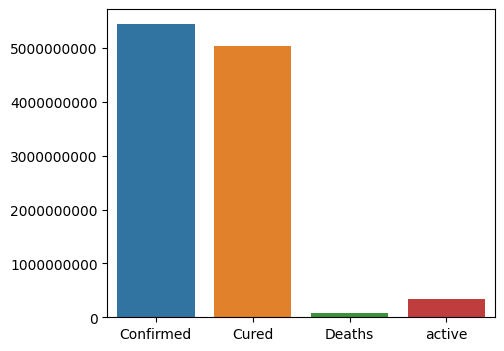

In [16]:
"Barplot for Confirmed , Deaths , Cured , Active"
fig = plt.figure(figsize=(5,4))
barplot = sns.barplot(x=['Confirmed','Cured','Deaths','active'],y=[confirm,cured,deaths,active])
barplot.set_yticklabels(labels=(barplot.get_yticks()*1).astype(int))
plt.show()

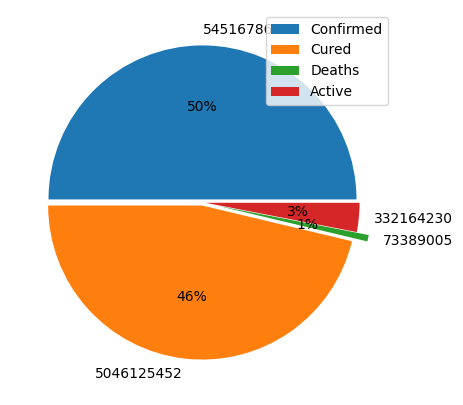

In [17]:
"Piechart for 'Confirmed','Cured',Deaths & 'Active'"
fig = plt.figure(figsize=(7,5))
df_keys = [confirm,cured,deaths,active]
plt.pie(df_keys,labels = df_keys, explode = (0.02,0.02,0.1,0.02), autopct = '%.0f%%')
plt.legend(['Confirmed','Cured','Deaths','Active'])


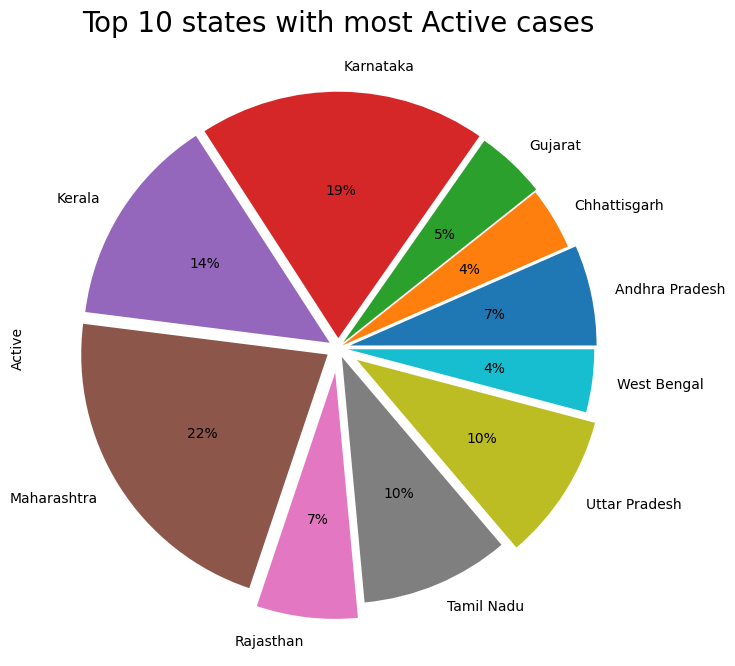

In [18]:
"Pie Chart Of 10 Top states with Active Cases"
fig = plt.figure(figsize=(10,8))
df_active.groupby(["State/UnionTerritory"]).sum()["Active"].plot(kind='pie',rot=90,explode=(0.05,0.02,0.03,0.04,0.04,0.05,0.1,0.04,0.09,0.04),autopct='%1.0f%%')
plt.title('Top 10 states with most Active cases',size=20)
plt.show()

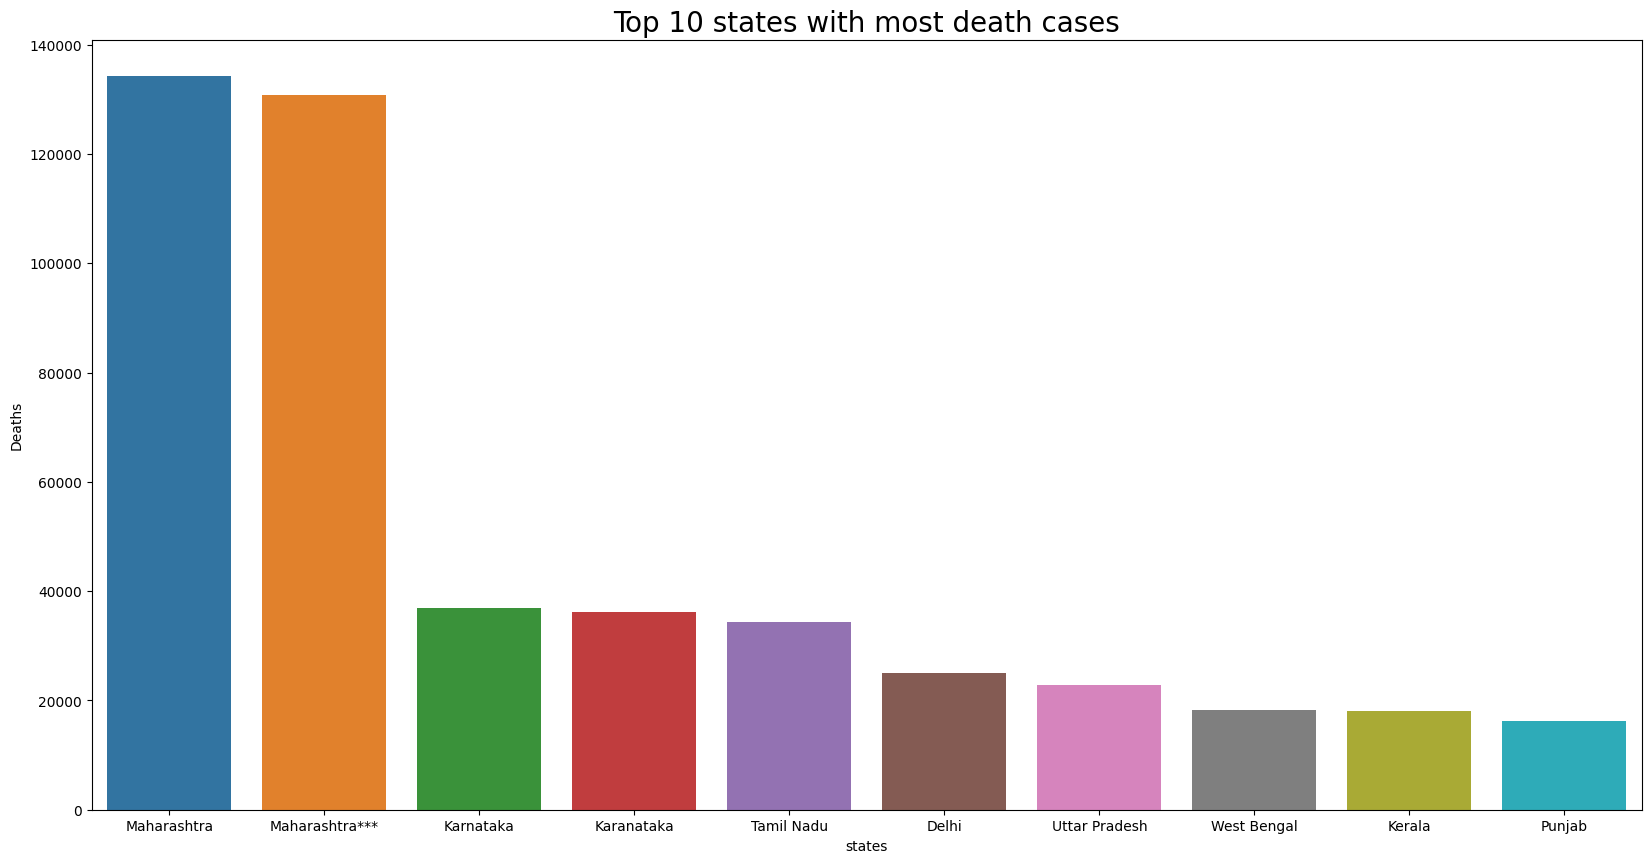

In [19]:
"Bar graph with top 10 states with most Death cases"
df_deaths = df_india.groupby('State/UnionTerritory').max()[['Deaths','Date']].sort_values(by='Deaths',ascending=False).reset_index()
fig = plt.figure(figsize=(20,10))
plot1 = sns.barplot(data = df_deaths.iloc[:10],y='Deaths',x='State/UnionTerritory')
plt.title('Top 10 states with most death cases', size=20)
plt.xlabel('states')
plt.ylabel('Deaths')
plt.show()

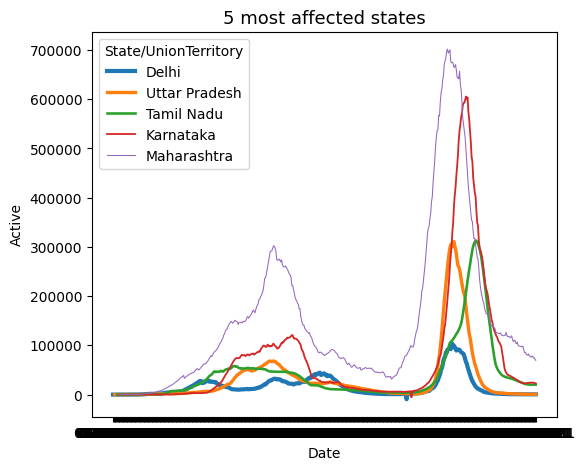

In [20]:
" Top 5 Most affected states"
fig = plt.figure(figsize=(6,5))
plot = sns.lineplot(data = df_india[df_india['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Tamil Nadu','Delhi','Uttar Pradesh'])],x='Date',y='Active',hue = 'State/UnionTerritory',size='State/UnionTerritory')
plt.title('5 most affected states',size=13)
plt.show()

<ipython-input-21-3c46a4e7fc72>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_india.corr(),cmap="Blues")


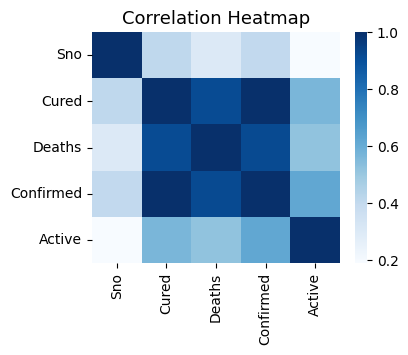

In [21]:
"Correlation Heatmap"
fig = plt.figure(figsize=(4,3))
sns.heatmap(df_india.corr(),cmap="Blues")
plt.title('Correlation Heatmap',size=13)
plt.show()

Data Analysis: Vaccination Status in India

In [23]:
vaccine_df = pd.read_csv("/content/covid_vaccine_statewise.csv")
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [24]:
vaccine_df.rename(columns={'Updated On' : 'Vaccine_Date'}, inplace = True)


In [25]:
vaccine_df.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [26]:
vaccine = vaccine_df.drop(columns=['18-44 Years (Doses Administered)','60+ Years (Doses Administered)','45-60 Years (Doses Administered)','Sputnik V (Doses Administered)','AEFI'],axis = 1)

Vaccine Data Visualisation

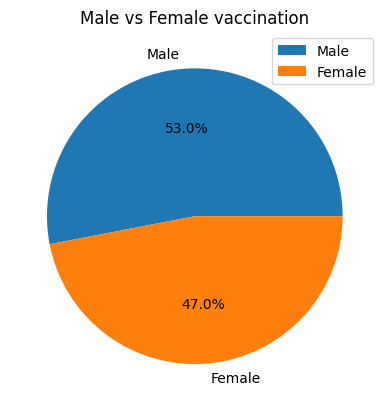

In [27]:
male = vaccine['Male(Individuals Vaccinated)'].sum()
female = vaccine['Female(Individuals Vaccinated)'].sum()
labels = ['Male','Female']
x = np.array([male,female])
plt.pie(x,labels = labels,autopct='%.1f%%')
plt.title('Male vs Female vaccination')
plt.legend()
plt.show()

In [28]:
vaccine1 = vaccine_df[vaccine_df.State != 'India']
vaccine1.rename(columns={'Total Individuals Vaccinated' : 'Total'},inplace = True)
vaccine1.head()

<ipython-input-28-52a9b0401e09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine1.rename(columns={'Total Individuals Vaccinated' : 'Total'},inplace = True)


,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [29]:
vaccine1.rename(columns={'Total Individuals Vaccinated' : 'Total'},inplace = True)
max_vac = vaccine1.groupby('State')['Total'].sum().to_frame()
max_vac = max_vac.sort_values('Total' , ascending = False)[:5]
max_vac.head()

<ipython-input-29-b55522e60639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine1.rename(columns={'Total Individuals Vaccinated' : 'Total'},inplace = True)


,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


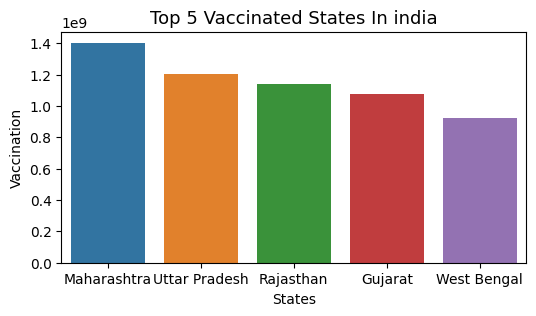

In [30]:
"Vaccination Bar Graph"
fig = plt.figure(figsize=(6,3))
plt.title("Top 5 Vaccinated States In india",size = 13)
x = sns.barplot(data = max_vac.iloc[:10],y = max_vac.Total, x = max_vac.index, linewidth = 2)
plt.xlabel('States')
plt.ylabel("Vaccination")
plt.show()